<a href="https://colab.research.google.com/github/Ashish-kundu/Oasis_internship/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from openpyxl import Workbook,load_workbook

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.shape

(205, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
200    0
201    0
202    0
203    0
204    0
Length: 205, dtype: int64

In [ ]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [ ]:
Car_Company=[]
for model in df['CarName']:
  Car_Company.append(str(model.split(' ')[0]))
df['Car_company']=np.array(Car_Company)


<ipython-input-67-0a9daa8d46e1>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(df.groupby(['Car_company']).median()["price"][:10])


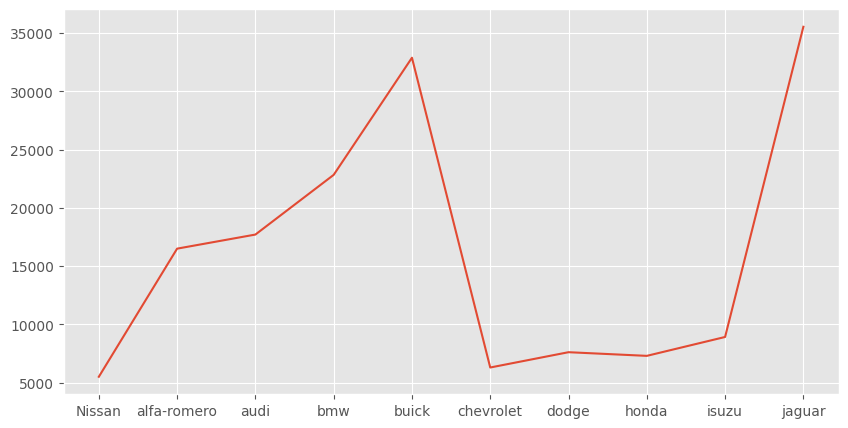

In [ ]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(10,5))
    plt.plot(df.groupby(['Car_company']).median()["price"][:10])
    plt.show()

In [ ]:
df.CarName=df.CarName.astype('category').cat.codes
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_company
0,1,3,2,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,3,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,1,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,4,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,5,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [ ]:
df.car_company = df.Car_company.astype('category').cat.codes
df.head()

<ipython-input-69-e95eb9e20d4a>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.car_company = df.Car_company.astype('category').cat.codes


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_company
0,1,3,2,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,3,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,1,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,4,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,5,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


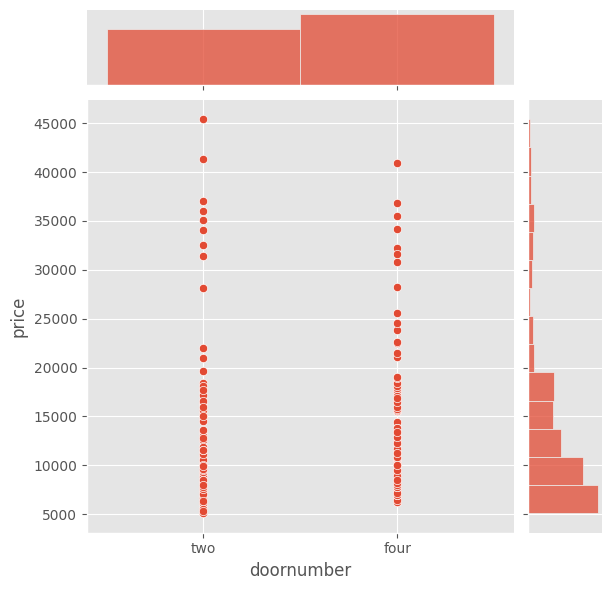

In [ ]:
with plt.style.context(('ggplot')):
    sns.jointplot(x=df["doornumber"],y=df["price"],data=df)

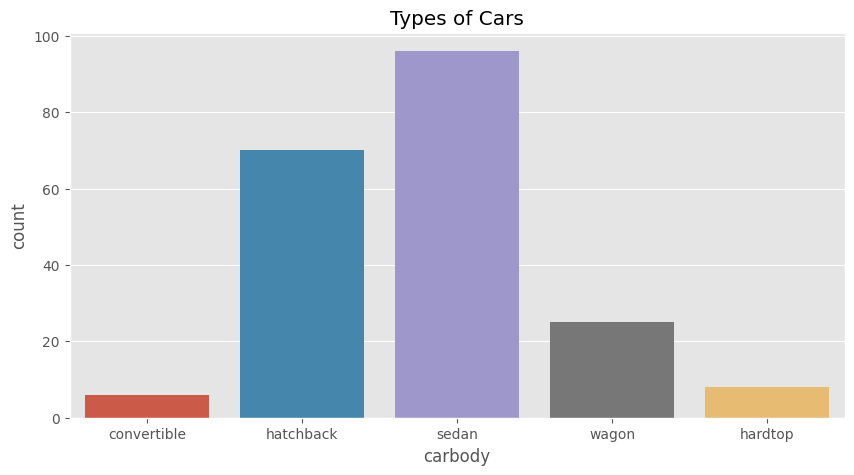

In [ ]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(10,5))
    plt.title("Types of Cars")
    sns.countplot(data=df,x=df['carbody'])
    plt.show()

In [ ]:
df.fueltype = df.fueltype.astype('category').cat.codes
df.aspiration = df.aspiration.astype('category').cat.codes
df.doornumber = df.doornumber.astype('category').cat.codes
df.carbody = df.carbody.astype('category').cat.codes
df.drivewheel = df.drivewheel.astype('category').cat.codes
df.enginelocation = df.enginelocation.astype('category').cat.codes
df.enginetype = df.enginetype.astype('category').cat.codes
df.cylindernumber = df.cylindernumber.astype('category').cat.codes
df.fuelsystem = df.fuelsystem.astype('category').cat.codes

In [ ]:
df = df.drop(['car_ID'], axis = 1)


In [ ]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'Car_company'],
      dtype='object')

In [ ]:
df.corr()

<ipython-input-75-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.107095,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,-0.357612,...,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
CarName,-0.107095,1.000000,-0.069435,0.019914,-0.171745,0.099691,-0.016129,0.055968,0.014550,0.053016,...,-0.153982,0.123845,0.188598,-0.181775,0.101730,-0.092131,-0.138309,0.093437,0.102895,-0.231439
fueltype,0.194311,-0.069435,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,...,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,-0.059866,0.019914,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,0.664073,-0.171745,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,-0.398568,...,-0.020742,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835
carbody,-0.596135,0.099691,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,-0.041671,-0.016129,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.212471,0.055968,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,-0.531954,0.014550,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,...,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.053016,-0.212679,0.234539,-0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,...,0.683360,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920


In [ ]:
cor_matrix=np.array(df.corr())
for i in range(25):
    for j in range(25):
        if(np.abs(cor_matrix[i][j])>=0.85 and np.abs(cor_matrix[i][j])<1 ):
            print(f"{df.columns[i]} ----co-related-----{df.columns[j]}----{cor_matrix[i][j]}")

fueltype ----co-related-----compressionratio-----0.9843560568767543
wheelbase ----co-related-----carlength----0.874587475964264
carlength ----co-related-----wheelbase----0.874587475964264
carlength ----co-related-----curbweight----0.8777284608306433
carwidth ----co-related-----curbweight----0.8670324646791233
curbweight ----co-related-----carlength----0.8777284608306433
curbweight ----co-related-----carwidth----0.8670324646791233
curbweight ----co-related-----enginesize----0.850594073426277
enginesize ----co-related-----curbweight----0.850594073426277
enginesize ----co-related-----price----0.8741448025245117
compressionratio ----co-related-----fueltype-----0.9843560568767543
citympg ----co-related-----highwaympg----0.9713370423425045
highwaympg ----co-related-----citympg----0.9713370423425045
price ----co-related-----enginesize----0.8741448025245117


<ipython-input-76-5de7368fd9f4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix=np.array(df.corr())


In [ ]:
df.dtypes

symboling             int64
CarName               int16
fueltype               int8
aspiration             int8
doornumber             int8
carbody                int8
drivewheel             int8
enginelocation         int8
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype             int8
cylindernumber         int8
enginesize            int64
fuelsystem             int8
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
Car_company          object
dtype: object

In [ ]:
y=df["price"]
x=df.drop(["price"],axis=1)

In [ ]:
def accuarcy_generator(x_val,y_val,split=0.8):
    sc=StandardScaler()
    x_train,x_test,y_train,y_test=train_test_split(x_val,y_val,train_size=split)
    x_train_scaled=sc.fit_transform(x_train)
    x_test_scaled=sc.fit_transform(x_test)
    model1=LinearRegression()
    model1.fit(x_train,y_train)
    model2=LinearRegression()
    model2.fit(x_train_scaled,y_train)
    y_pred=model1.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    ac1=model1.score(x_test,y_test)
    y_pred1=model2.predict(x_test_scaled)
    rmse2=np.sqrt(mean_squared_error(y_test,y_pred1))
    ac2=model2.score(x_test_scaled,y_test)
    return rmse,ac1,rmse2,ac2

In [ ]:
X=df.drop(['price',],axis=1)
X.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Car_company
0,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,alfa-romero
1,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,alfa-romero
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,alfa-romero
3,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,audi
4,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,audi


In [ ]:
y=df.price
y.head(5)

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [ ]:
X2=df.drop(['price','Car_company'],axis=1)
X2.head()


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,2,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,3,3,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,1,1,1,0,1,2,2,0,94.5,171.2,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,2,4,1,0,0,3,1,0,99.8,176.6,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,2,5,1,0,0,3,0,0,99.4,176.6,...,1,136,5,3.19,3.40,8.0,115,5500,18,22


###Linear Regression


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2,y,test_size=0.2,random_state=10)
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6061618144782062

###K Fold Cross Validation


In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X2, y, cv=cv)

array([0.811323  , 0.8937244 , 0.84138155, 0.77351072, 0.89938962])